In [3]:
import geopandas as gpd
import contextily as ctx
import geoplot

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
rides = pd.read_csv('taxi_rides.csv')

In [6]:
research = pd.read_csv('user-research.csv') 

In [7]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,id3487442,2,2/29/16 18:39,2/29/16 18:42,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0,NaN,NaN,NaN
1,id1145809,2,5/16/16 23:15,5/16/16 23:31,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0,NaN,NaN,NaN
2,id3499387,1,1/25/16 19:45,1/25/16 19:54,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0,NaN,NaN,NaN
3,id0753277,1,1/27/16 22:29,1/27/16 22:29,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0,NaN,NaN,NaN
4,id2134482,1,1/22/16 16:13,1/22/16 16:13,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.0,NaN,NaN,NaN


In [8]:
research.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN


In [9]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1048468 non-null  object 
 1   vendor_id           1048468 non-null  int64  
 2   pickup_datetime     1048468 non-null  object 
 3   dropoff_datetime    1048468 non-null  object 
 4   passenger_count     1048468 non-null  int64  
 5   pickup_longitude    1048468 non-null  float64
 6   pickup_latitude     1048468 non-null  float64
 7   dropoff_longitude   1048468 non-null  float64
 8   dropoff_latitude    1048468 non-null  float64
 9   store_and_fwd_flag  1048468 non-null  object 
 10  duration            1048468 non-null  int64  
 11  distance            1048468 non-null  float64
 12  Unnamed: 12         0 non-null        float64
 13  Unnamed: 13         0 non-null        float64
 14  Unnamed: 14         0 non-null        float64
dtypes: float64(8), 

In [10]:
rides.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
      dtype='object')

In [11]:
rides.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'], axis = 1, inplace = True)

In [12]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
0,id3487442,2,2/29/16 18:39,2/29/16 18:42,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0
1,id1145809,2,5/16/16 23:15,5/16/16 23:31,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0
2,id3499387,1,1/25/16 19:45,1/25/16 19:54,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0
3,id0753277,1,1/27/16 22:29,1/27/16 22:29,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0
4,id2134482,1,1/22/16 16:13,1/22/16 16:13,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.0


In [14]:
rides['pickup_datetime'] = pd.to_datetime(rides.pickup_datetime)

In [15]:
rides['dropoff_datetime'] = pd.to_datetime(rides.dropoff_datetime)

In [16]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048468 non-null  object        
 1   vendor_id           1048468 non-null  int64         
 2   pickup_datetime     1048468 non-null  datetime64[ns]
 3   dropoff_datetime    1048468 non-null  datetime64[ns]
 4   passenger_count     1048468 non-null  int64         
 5   pickup_longitude    1048468 non-null  float64       
 6   pickup_latitude     1048468 non-null  float64       
 7   dropoff_longitude   1048468 non-null  float64       
 8   dropoff_latitude    1048468 non-null  float64       
 9   store_and_fwd_flag  1048468 non-null  object        
 10  duration            1048468 non-null  int64         
 11  distance            1048468 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 96

In [ ]:
#rides.to_csv('rides.csv', index=False)

In [17]:
s_rides = rides.sample(10000)

In [179]:
s_rides.to_csv('s_rides.csv', index=False)

In [18]:
s_rides.pickup_datetime.min()

Timestamp('2016-01-01 00:01:00')

In [20]:
rides.pickup_datetime.min()

Timestamp('2016-01-01 00:00:00')

In [21]:
s_rides.pickup_datetime.max()

Timestamp('2016-06-30 23:53:00')

In [22]:
rides.pickup_datetime.max()

Timestamp('2016-06-30 23:59:00')

In [25]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,duration,distance
pickup_datetime,,,,,,,,
1,2414,2586,-116506.670876,64180.306328,-116506.836792,64182.731518,1521661,5391.602469
2,2432,2623,-117615.855728,64793.385452,-117619.191254,64791.090771,1525927,5370.257423
3,2844,3035,-135220.676102,74493.815075,-135222.051231,74494.916969,1710330,6492.543350
4,2689,2907,-129303.943840,71232.235466,-129307.226609,71233.514454,1854755,5946.562529
5,2578,2862,-124644.175911,68664.974411,-124643.569153,68665.026856,1810190,6398.222147
6,2429,2653,-116431.902893,64140.931213,-116431.701042,64143.279827,1782654,5785.492645


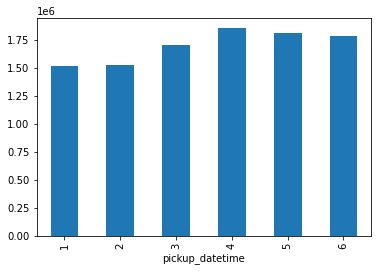

In [26]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()['duration'].plot(kind = 'bar');

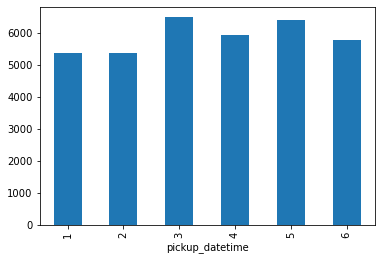

In [27]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()['distance'].plot(kind = 'bar');

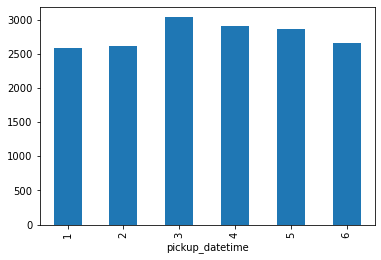

In [28]:
s_rides.groupby(s_rides.pickup_datetime.dt.month).sum()['passenger_count'].plot(kind = 'bar');

**Questions**

1. What is your email?
2. What gender do you identify as?
3. What is your age?
4. What is your annual income? (income bands)
5. What neighborhood do you reside in?
6. Do you currently use taxis? (Y/N)
7. Do you currently use ridesharing services? (Y/N)
8. Would you use a flying taxi service, if such a concept existed? (Y/N)
9. If yes to Q8, how much would you be willing to pay per mile for such a service? (USD)
10. If no to Q8, what is the reason?

In [29]:
research.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,emailofnewyorker+369@gmail.com,M,65.0,"$80,000 - $120,000",Hudson Yards,N,Y,Y,22.0,NaN
1,emailofnewyorker+429@gmail.com,F,25.0,"$120,000 - $200,000",Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
2,emailofnewyorker+159@gmail.com,F,49.0,"$20,001 - $40,000",Theater District,N,Y,Y,6.0,NaN
3,emailofnewyorker+414@gmail.com,M,72.0,"> $200,000",Tribeca,Y,N,N,NaN,Wouldn't trust the person flying it
4,emailofnewyorker+375@gmail.com,F,42.0,"$80,000 - $120,000",Yorkville,N,N,Y,24.0,NaN


In [45]:
def labels(title, xaxis, yaxis):
    #'''A function that gives labels to plots'''
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)

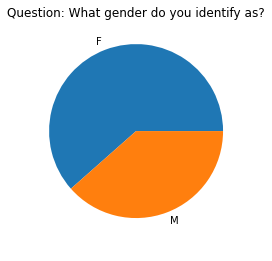

In [152]:
research.Q2.value_counts().plot(kind = 'pie')
labels('Question: What gender do you identify as?',' ', ' ')

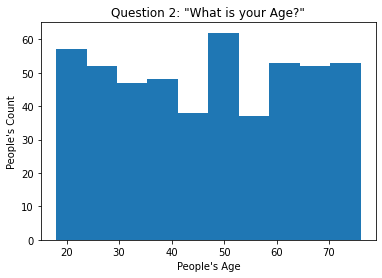

In [47]:
plt.hist(research.Q3)
labels('Question 3: "What is your Age?"', "People's Age", "People's Count")

In [89]:
research.Q4.isnull().sum()

100

In [49]:
research.Q4.value_counts()

$40,001 - $80,000      134
$80,000 - $120,000     118
$120,000 - $200,000     99
$20,001 - $40,000       66
> $200,000              57
$0 - $20,000            25
Name: Q4, dtype: int64

In [51]:
list(research.Q4.unique())

['$80,000 - $120,000',
 '$120,000 - $200,000',
 '$20,001 - $40,000',
 '> $200,000',
 '$0 - $20,000',
 '$40,001 - $80,000',
 nan]

In [133]:
research.loc[pd.isnull(research.Q4)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
1,emailofnewyorker+429@gmail.com,F,25.0,NaN,Fort George,Y,Y,N,NaN,I think it is more unsafe than taxis
5,emailofnewyorker+94@gmail.com,F,40.0,NaN,Midtown,Y,Y,Y,30.0,NaN
9,emailofnewyorker+86@gmail.com,M,46.0,NaN,Theater District,Y,N,Y,40.0,NaN
16,emailofnewyorker+134@gmail.com,M,68.0,NaN,Radio Row,Y,Y,Y,34.0,NaN
23,emailofnewyorker+82@gmail.com,F,52.0,NaN,Washington Heights,Y,Y,Y,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...
483,emailofnewyorker+109@gmail.com,F,64.0,NaN,Little Australia,N,Y,Y,36.0,NaN
484,emailofnewyorker+96@gmail.com,F,48.0,NaN,Midtown West,Y,Y,Y,25.0,NaN
486,emailofnewyorker+74@gmail.com,F,31.0,NaN,Little Brazil,Y,Y,Y,26.0,NaN
491,emailofnewyorker+85@gmail.com,F,35.0,NaN,Tudor City,N,Y,Y,30.0,NaN


In [134]:
research.Q4.fillna('Null Values', inplace = True)

In [135]:
research.Q4.value_counts()

$40,001 - $80,000     134
$80,000 - $120,000    118
Null Values           100
$20,001 - $40,000      66
> $200,000             57
$0 - $20,000           25
Name: Q4, dtype: int64

In [136]:
from pandas.api.types import CategoricalDtype
#income_series = pd.Series(['$0 - $20,000', '$20,001 - $40,000', '$40,001 - $80,000', '$80,000 - $120,000', '> $200,000'])
cat_income = CategoricalDtype(
    categories = ['$0 - $20,000','$20,001 - $40,000','$40,001 - $80,000', '$80,000 - $120,000', '> $200,000', 'Null Values'], 
    ordered = True)
research['Q4'] = research.Q4.astype(cat_income)

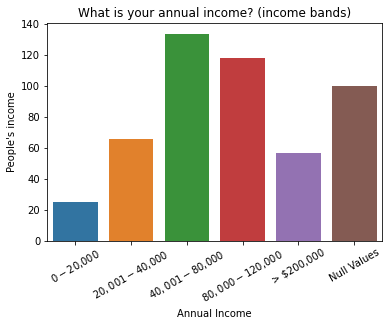

In [137]:
sns.countplot(x = research.Q4)
plt.xticks(rotation=30)
labels("What is your annual income? (income bands)", "Annual Income", "People's income")

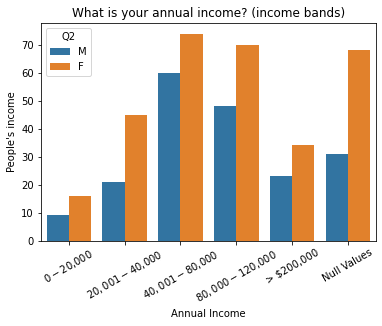

In [138]:
sns.countplot(x = research.Q4, hue = research.Q2)
plt.xticks(rotation=30)
labels("What is your annual income? (income bands)", "Annual Income", "People's income")

In [145]:
research.Q5.isnull().sum()

0

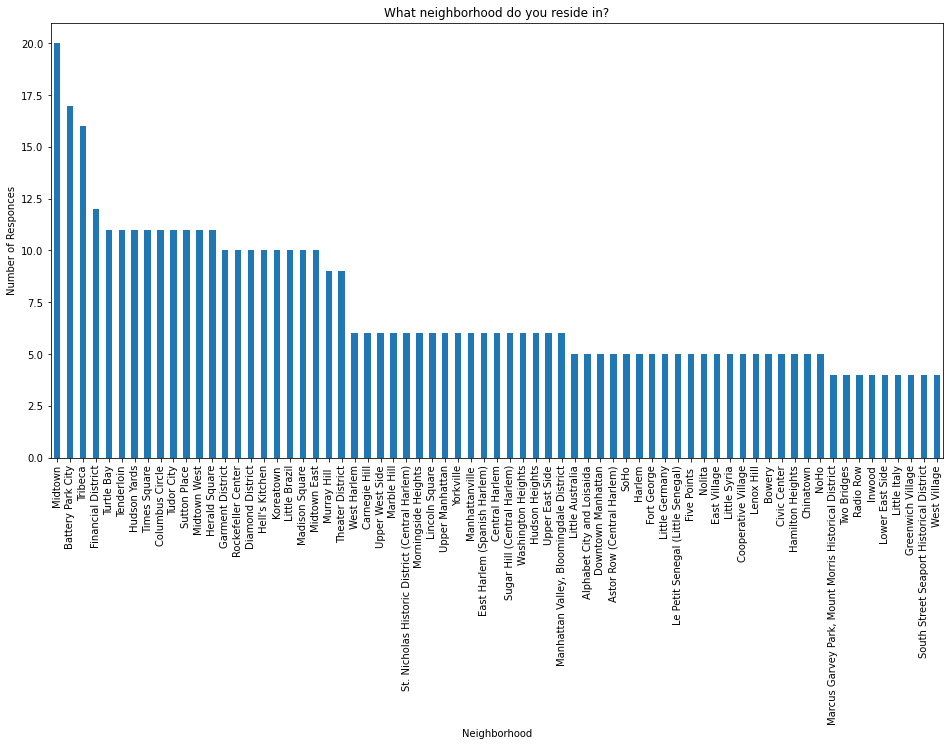

In [144]:
research.Q5.value_counts().plot(kind = 'bar', figsize = [16, 8])
labels('What neighborhood do you reside in?', 'Neighborhood', 'Number of Responces')

In [146]:
research.Q6.value_counts()

Y    406
N     93
Name: Q6, dtype: int64

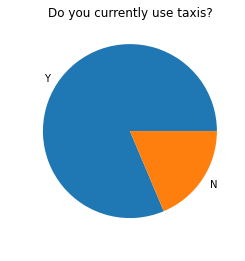

In [151]:
#Do you currently use taxis?
research.Q6.value_counts().plot(kind = 'pie')
labels('Do you currently use taxis?', ' ', ' ')

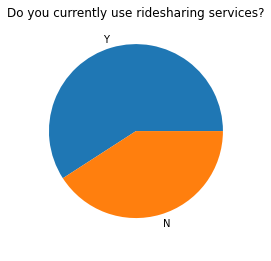

In [153]:
#Do you currently use ridesharing services? (Y/N)
research.Q7.value_counts().plot(kind = 'pie')
labels('Do you currently use ridesharing services?', ' ', ' ')

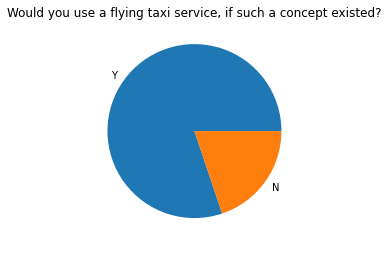

In [155]:
#Would you use a flying taxi service, if such a concept existed? (Y/N)
research.Q8.value_counts().plot(kind = 'pie')
labels('Would you use a flying taxi service, if such a concept existed?', ' ', ' ')

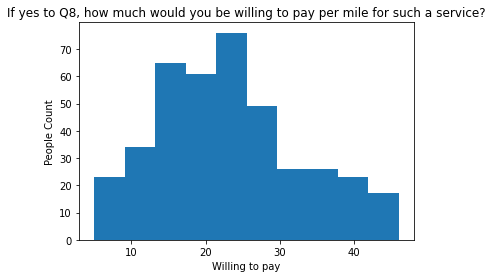

In [159]:
#If yes to Q8, how much would you be willing to pay per mile for such a service? (USD)
plt.hist(research.Q9)
labels('If yes to Q8, how much would you be willing to pay per mile for such a service?', 'Willing to pay', 'People Count');

In [160]:
research.Q9.isnull().sum()

100

In [161]:
research.Q10.isnull().sum()

400

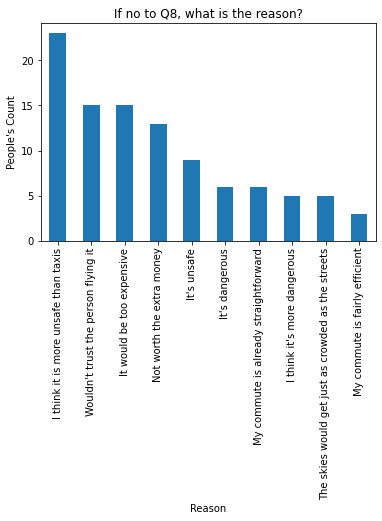

In [162]:
research.Q10.value_counts().plot(kind = 'bar')
labels('If no to Q8, what is the reason?', 'Reason', "People's Count")

Explore trip dataset

In [164]:
rides.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance'],
      dtype='object')

In [165]:
rides.passenger_count.value_counts()

1    743056
2    151060
5     56249
3     43033
6     34692
4     20334
0        39
7         3
9         1
8         1
Name: passenger_count, dtype: int64

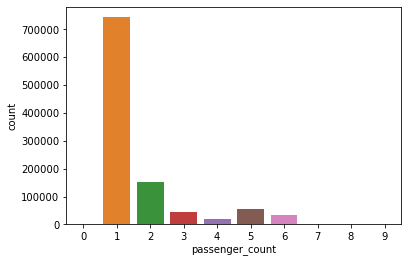

In [166]:
sns.countplot(rides.passenger_count);

In [167]:
min(rides.pickup_longitude.min(), rides.dropoff_longitude.min())

-79.81797791

In [168]:
max(rides.pickup_longitude.max(), rides.dropoff_longitude.max())

-61.33552933

In [169]:
min(rides.pickup_latitude.min(), rides.dropoff_latitude.min())

32.181140899999995

In [170]:
max(rides.pickup_latitude.max(), rides.dropoff_latitude.max())

51.88108444

In [171]:
BBox = (min(rides.pickup_longitude.min(), rides.dropoff_longitude.min()), max(rides.pickup_longitude.max(), rides.dropoff_longitude.max()),
        min(rides.pickup_latitude.min(), rides.dropoff_latitude.min()), max(rides.pickup_latitude.max(), rides.dropoff_latitude.max()))

In [172]:
BBox

(-79.81797791, -61.33552933, 32.181140899999995, 51.88108444)

In [173]:
map = plt.imread('map.png')

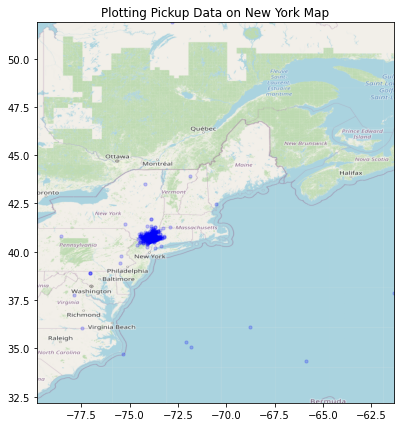

In [174]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(rides.pickup_longitude, rides.pickup_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Pickup Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal');

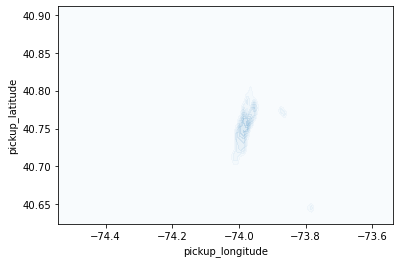

In [175]:
sns.kdeplot(s_rides.pickup_longitude, s_rides.pickup_latitude, shade=True, alpha= 0.2)

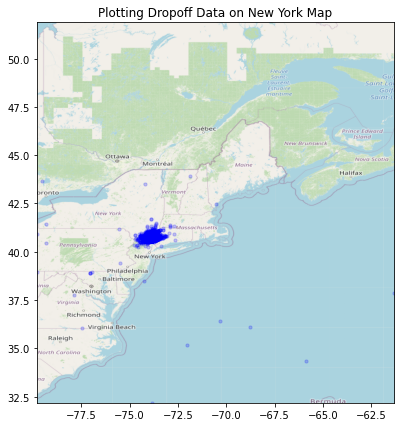

In [176]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(rides.dropoff_longitude, rides.dropoff_latitude, zorder=1, alpha= 0.2, c='b', s=10)
ax.set_title('Plotting Dropoff Data on New York Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, zorder=0, extent = BBox, aspect= 'equal');

In [177]:
rides.shape

(1048468, 12)

In [178]:
rides.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.0
1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.0
2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.0
3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.0
4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.0


In [180]:
#check where pickup point is the same with dropoff point
tourist_rides = rides.query('pickup_longitude == dropoff_longitude & pickup_latitude == dropoff_latitude' )

In [181]:
tourist_rides.to_csv('tourist_rides.csv', index=False)

In [182]:
#check where pickup point is different to dropoff point
taxi_rides = rides.query('pickup_longitude != dropoff_longitude & pickup_latitude != dropoff_latitude' )

In [183]:
taxi_rides.to_csv('transfer_rides.csv', index=False)

In [184]:
tourist_rides

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
0,id3487442,2,2016-02-29 18:39:00,2016-02-29 18:42:00,1,-73.981819,40.768963,-73.981819,40.768963,N,227,0.000000
1,id1145809,2,2016-05-16 23:15:00,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,0.000000
2,id3499387,1,2016-01-25 19:45:00,2016-01-25 19:54:00,1,-73.786720,40.647041,-73.786720,40.647041,N,580,0.000000
3,id0753277,1,2016-01-27 22:29:00,2016-01-27 22:29:00,1,-74.209854,40.816853,-74.209854,40.816853,N,27,0.000000
4,id2134482,1,2016-01-22 16:13:00,2016-01-22 16:13:00,1,-73.776314,40.645454,-73.776314,40.645454,N,19,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4175,id1051630,2,2016-04-13 17:30:00,2016-04-13 17:39:00,1,-73.961128,40.767426,-73.961128,40.767426,N,587,0.000134
4176,id3423807,2,2016-01-26 16:24:00,2016-01-26 16:38:00,1,-73.817055,40.704117,-73.817055,40.704117,N,846,0.000134
4177,id0613000,1,2016-05-30 19:49:00,2016-05-30 19:49:00,1,-73.986900,40.739613,-73.986900,40.739613,N,19,0.000134
4178,id3157473,2,2016-02-23 11:45:00,2016-02-23 11:47:00,1,-73.973518,40.764000,-73.973518,40.764000,N,137,0.000134


In [185]:
taxi_rides

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,duration,distance
4454,id2185383,1,2016-01-24 13:10:00,2016-01-24 13:11:00,1,-73.518051,41.091171,-73.518059,41.091167,N,42,0.000759
4455,id1094055,1,2016-03-22 11:15:00,2016-03-22 11:15:00,1,-73.951279,40.781483,-73.951286,40.781487,N,3,0.000765
4456,id3013953,1,2016-03-18 15:08:00,2016-03-18 15:08:00,1,-73.945496,40.751663,-73.945503,40.751667,N,35,0.000765
4457,id1424741,1,2016-06-26 04:42:00,2016-06-26 04:45:00,1,-73.860497,40.719349,-73.860504,40.719345,N,144,0.000765
4458,id2734399,1,2016-02-27 06:59:00,2016-02-27 06:59:00,1,-73.906921,40.752312,-73.906929,40.752308,N,2,0.000765
...,...,...,...,...,...,...,...,...,...,...,...,...
1048463,id0982904,1,2016-04-28 13:32:00,2016-04-28 14:14:00,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,545.853499
1048464,id1001696,1,2016-02-24 21:02:00,2016-02-24 21:25:00,1,-73.972366,40.758633,-79.553535,43.674000,N,1405,562.235188
1048465,id1146400,1,2016-02-15 18:57:00,2016-02-15 19:02:00,2,-73.989914,40.756634,-70.346077,36.398121,N,303,578.842818
1048466,id1510552,2,2016-01-06 20:40:00,2016-01-06 20:51:00,5,-71.799896,35.081532,-79.352837,40.436329,N,611,891.214103


In [186]:
s_rides = rides.sample(10000)
gdf = gpd.GeoDataFrame(s_rides, geometry=gpd.points_from_xy(s_rides.pickup_longitude, s_rides.pickup_latitude), crs="EPSG:3857")

In [187]:
gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [188]:
boros = gpd.read_file(gpd.datasets.get_path("nybb"))

In [189]:
boros.BoroName

0    Staten Island
1           Queens
2         Brooklyn
3        Manhattan
4            Bronx
Name: BoroName, dtype: object

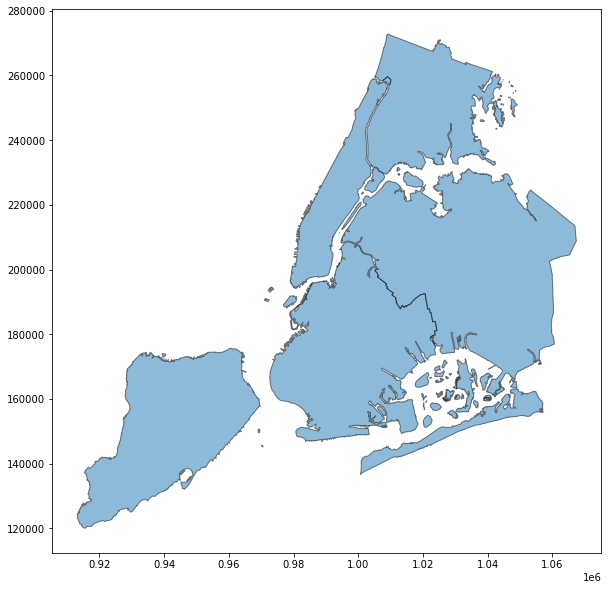

In [190]:
df = gpd.read_file(gpd.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [191]:
df = df.to_crs(epsg=3857)

In [192]:
gdf = df.to_crs(epsg=3857)

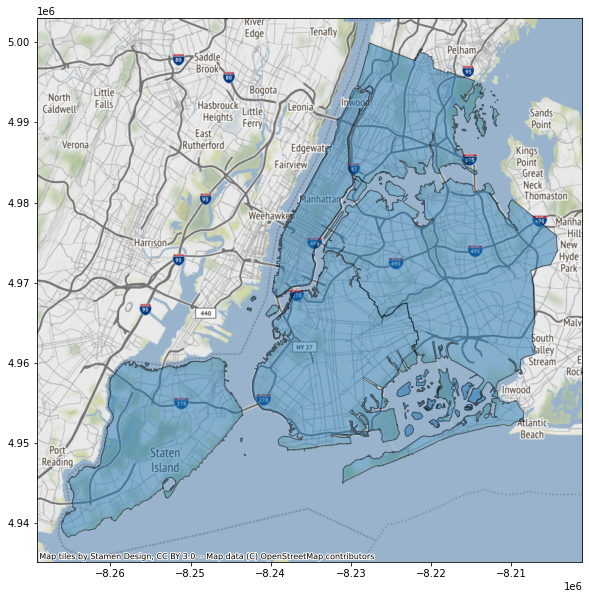

In [193]:
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [195]:
gdf.head()

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-8243264.876 4948597.810, -824..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-8219461.955 4952778.645, -821..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-8222843.701 4950893.717, -822..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-8238858.850 4965914.966, -823..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-8226155.123 4982269.863, -822..."


In [196]:
rides.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'duration', 'distance'],
      dtype='object')

In [197]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048468 entries, 0 to 1048467
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1048468 non-null  object        
 1   vendor_id           1048468 non-null  int64         
 2   pickup_datetime     1048468 non-null  datetime64[ns]
 3   dropoff_datetime    1048468 non-null  datetime64[ns]
 4   passenger_count     1048468 non-null  int64         
 5   pickup_longitude    1048468 non-null  float64       
 6   pickup_latitude     1048468 non-null  float64       
 7   dropoff_longitude   1048468 non-null  float64       
 8   dropoff_latitude    1048468 non-null  float64       
 9   store_and_fwd_flag  1048468 non-null  object        
 10  duration            1048468 non-null  int64         
 11  distance            1048468 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 96

In [198]:
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((-8243264.876 4948597.810, -824..."
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((-8219461.955 4952778.645, -821..."
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((-8222843.701 4950893.717, -822..."
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((-8238858.850 4965914.966, -823..."
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((-8226155.123 4982269.863, -822..."


In [ ]:
#https://geopandas.org/mapping.html#choropleth-maps